## **EDA :** Blank book

#### _Name of Dataset_

🟠 `on work` 🟢 `complete`

---

1. **Identification générale**
    * Structure
    * Donnée(s) cible(s)
    * Types de données
    * Contenu des données
    * Préparation
    * Conclusion
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
3. **Analyse bivariée**
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
    * Statistiques
4. **Finalisation**
    * Conclusion
    * Traitements

**Built-in**

In [10]:
# Built-in Modules from Python
import math

**Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

**User Code**

In [5]:
# Useful code for EDA
draw = True # Enable/Disable long ploting

**Notebook setup**

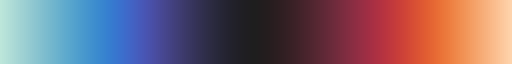

In [13]:
# Colour codes
mean_c = 'white'
median_c = '#c2e800'
default_c = '#009999'
default_p = 'icefire'
palette_c = [
    '#b8e600', # Limon
    '#e60073' # Magenta
]
hue_o = [
    'No',
    'Yes'
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, icefire ...
sns.color_palette(default_p, as_cmap=True)

**Name of dataset**

[Source of dataset](https://www.kaggle.com/datasets)

In [ ]:
name_file_path = '../_datasets/name_data.csv'
data = pd.read_csv(name_file_path)

data

In [6]:
target = ''

---
### **1.** Identification générale

##### **1.1** - Structure

In [ ]:
# (!) - .shape, .info(), etc.

In [ ]:
data.info()

##### **1.2** - Donnée(s) cible(s)

In [ ]:
# (!) - .unique(), etc.

In [ ]:
data[target].unique()

##### **1.3** - Types de données

In [ ]:
# (!) - .dtypes.value_counts(), .dtypes, .select_dtypes(np.float64).max(), etc.

In [ ]:
pd.DataFrame({
    'Quantité de valeurs': data.dtypes.value_counts()
})

In [ ]:
if data.select_dtypes(np.float_).shape[1] > 0 :
    display(
        pd.DataFrame({
            'Valeurs minimums (float)': data.select_dtypes(np.float_).min(),
            'Valeurs maximums (float)': data.select_dtypes(np.float_).max()
        }, dtype=np.float_)
    )

In [ ]:
if data.select_dtypes(np.int_).shape[1] > 0 :
    display(
        pd.DataFrame({
            'Valeurs minimums (int)': data.select_dtypes(np.int_).min(),
            'Valeurs maximums (int)': data.select_dtypes(np.int_).max()
        }, dtype=np.int_)
    )

In [ ]:
if data.select_dtypes(np.object_).shape[1] > 0 :
    display(
        data.select_dtypes(np.object_)
    )

##### **1.4** - Contenu des données

Valeurs nulles

In [ ]:
# (!) - .isnull().sum(), heatmap( , cbar=False), etc.

In [ ]:
pd.DataFrame({
    'Quantité de valeurs nulles': data.isnull().sum(),
    'Pourcentage de valeurs nulles': (data.isnull().sum() / data.shape[0]) * 100,
}).sort_values(by='Quantité de valeurs nulles', ascending=False)

In [ ]:
plt.figure(figsize=(18,12))
plt.title("Valeurs manquantes\n")
sns.heatmap(data.isnull(), cbar=False)
plt.show()

Valeurs uniques

In [ ]:
# (!) - .unique(), nunique(), etc.

In [ ]:
if data.select_dtypes(np.int_).shape[1] > 0 :
    display(
        data.select_dtypes(np.int_).nunique()
    )

In [ ]:
if data.select_dtypes(np.object_).shape[1] > 0 :
    display(
        data.select_dtypes(np.object_).nunique()
    )

Valeurs dupliquées

In [ ]:
# (!) - Sample for duplicated data overviewing
# extract = data.loc[
#     (data['Column'] == 'Value') | 
#     (data['Column'] == 'Value')
# ]

# for col in ['ColumnA', 'ColumnB', 'etc.'] :
#     display( extract[[col, 'TargetColumn']].groupby('TargetColumn').describe() )

##### **1.5** - Préparation

* faciliter la manipulation et la visualisation
* explorer les possibilités `NumPy` et `Pandas`

In [ ]:
if True :
    raise Exception("[!] - Must Configure EDA to continue and set 'True' to 'False'")

In [ ]:
# Rename cols
columns = {
    'column name': 'col_new_name'
}

# Rename categories
theme_ctg = {
    0: 'categ 1',
    1: 'categ 2',
    2: 'categ 3'
}

# Apply
# data = data.rename(columns=columns)
# data['target'] = data[target].map(theme_ctg)

# data

In [ ]:
# (!) - Convert types to smaller memory size

In [ ]:
# (!) - Extract column names for variables
continous = None        # data.select_dtypes(np.float_).columns.to_list()
discretes = None        # data.select_dtypes(np.int_).columns.to_list()
categoricals = None     # data.select_dtypes(np.object_).columns.to_list()

hf_conti = math.ceil(len(continous) / 2)
hf_disc = math.ceil(len(discretes) / 2)
hf_categ = math.ceil(len(categoricals) / 2)

##### **1.6** - Notes

> —
> 
> ✔️ ❕ ❓
>
> —

---
### **2.** Analyse univariée

##### **2.1** - Cible

In [ ]:
hgt = data[target].value_counts().max()

plt.figure(figsize=(10, 8))
plt.title(f"Fréquence pour '{target}'\n")
ax = sns.countplot(data=data.sort_values(target), x=target, palette=palette_c)
ax.bar_label(ax.containers[0], padding=6)
plt.ylim(top=hgt*1.1)
plt.show()

In [ ]:
cnt = data[[target]].groupby(target).value_counts()
pct = (cnt / data.shape[0]) * 100

pd.DataFrame({
    'Quantité': cnt,
    'Pourcentage': pct
}).reset_index()

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

##### **2.2** - Variables quantitatives continues

Fréquences et densités

In [ ]:
if continous :    
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(hf_conti, 2, i+1)
        plt.title(f"Fréquences pour '{col}'\n")
        sns.histplot(data=data, x=col, fill=True, color=default_c)
    plt.show()

In [ ]:
if continous :    
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(hf_conti, 2, i+1)
        plt.title(f"Densité pour '{col}'\n")
        sns.kdeplot(data=data, x=col, fill=True, color=default_c)
        plt.axvline(data[col].mean(), c=mean_c, label='Mean')
        plt.axvline(data[col].median(), c=median_c, label="Median")
        plt.legend()
    plt.show()

    display(
        data[continous].describe().iloc[1:]
    )

Valeurs aberrantes

In [ ]:
if continous :
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(hf_conti, 2, i+1)
        plt.title(f"{col}\n")
        sns.boxplot(data=data, x=col, color="#FFFFFF")
    plt.show()

In [ ]:
# (!) - Sample to display entries with outlied features
# q25 = data[['ColumnA', 'ColumnB']].quantile(.25)
# q75 = data[['ColumnA', 'ColumnB']].quantile(.75)
# iqr = q75 - q25
# lows = q25 - (1.5 * iqr)
# ups = q75 + (1.5 * iqr)

# pd.DataFrame({
#     'Limite inférieure': lows,
#     'Limite suppérieure': ups,
# })

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

##### **2.3** - Variables quantitatives discrètes

Fréquences

In [ ]:
if discretes : 
    plt.figure(figsize=(18, 18), layout='tight')
    for i, col in enumerate(discretes) :
        plt.subplot(hf_disc, 2, i+1)
        plt.title(f"Fréquences pour '{col}'\n")
        sns.histplot(data=data, x=col, fill=True, discrete=True, shrink=.8, color=default_c)
    plt.show()

In [ ]:
if discretes :
    data[discretes].describe().T

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

##### **2.4** - Variables qualitatives

Fréquences

In [ ]:
if categoricals :
    plt.figure(figsize=(18, 18), layout='tight')
    for i, col in enumerate(categoricals) :
        hi_freq = data[col].value_counts().max()
        plt.subplot(hf_categ, 2, i+1)
        plt.title(f"Fréquence pour '{col}'\n")
        ax = sns.countplot(data=data.sort_values(col), x=col, palette=default_p)
        ax.bar_label(ax.containers[0], padding=6)
        plt.ylim(top=hi_freq*1.15)
    plt.show()

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

---
### **3.** Analyse bivariée

##### **3.1** - Variables quantitatives continues

Distribution selon la cible

In [ ]:
if continous :    
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(hf_conti, 2, i+1)
        plt.title(f"Fréquence pour '{col}' par target\n")
        sns.histplot(data=data, x=col, hue=target, hue_order=hue_o, multiple='stack', alpha=.7, palette=palette_c)
        # plt.axvline(data.loc[data[target] == 'No', col].median(), c=palette_c[0])
        # plt.axvline(data.loc[data[target] == 'Yes', col].median(), c=palette_c[1])

    plt.show()

In [ ]:
if continous :    
    plt.figure(figsize=(24, 24), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(hf_conti, 2, i+1)
        plt.title(f"Densité pour '{col}' par target\n")
        sns.kdeplot(data=data, x=col, hue=target, hue_order=hue_o, alpha=.1, linewidth=2, fill=True, palette=palette_c)
        # plt.axvline(data.loc[data[target] == 'No', col].mean(), c=palette_c[0])
        # plt.axvline(data.loc[data[target] == 'Yes', col].mean(), c=palette_c[1])

    plt.show()

Valeurs aberrantes et valeurs nulles par cible

In [ ]:
if continous :    
    plt.figure(figsize=(24, 48), layout='tight')
    for i, col in enumerate(continous) :
        plt.subplot(hf_conti, 2, i+1)
        plt.title(f"Dispersion pour '{col}' par target\n")
        sns.boxplot(data=data.sort_values(target), x=col, y=target, palette=palette_c)
        plt.ylabel('')

    plt.show()

Résumé

In [ ]:
if continous :
    for col in continous :
        display(data[[col, target]].groupby(target).describe().reset_index())

In [ ]:
if draw and continous :
    gd = sns.PairGrid(data[continous + [target]], diag_sharey=False, corner=True, hue=target, hue_order=hue_o, height=5, palette=palette_c)
    gd.map_lower(sns.kdeplot)
    gd.map_diag(sns.kdeplot)

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

##### **3.2** - Variables quantitatives discrètes

In [ ]:
if discretes :
    plt.figure(figsize=(18, 8), layout='tight')
    for i, col in enumerate(discretes) :
        plt.subplot(hf_disc, 2, i+1)
        plt.title(f"Fréquences pour '{col}' par '{target}'\n")
        sns.histplot(data=data, x=col, hue=target, hue_order=hue_o, multiple='stack', alpha=.7, discrete=True, shrink=.8, palette=palette_c)
    plt.show()

In [ ]:
if discretes :    
    for col in discretes :
        display(data[[col, target]].groupby(target).describe().reset_index())

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

##### **3.3** - Variables quantitatives

In [ ]:
if categoricals :
    plt.figure(figsize=(18, 18), layout='tight')
    for i, col in enumerate(categoricals) :
        plt.subplot(hf_categ, 2, i+1)
        plt.title(f"Fréquences pour '{col}' par '{target}'\n")
        sns.countplot(data=data, x=col, hue=target, hue_order=hue_o, palette=palette_c)
    
    plt.show()

In [ ]:
if categoricals :    
    plt.figure(figsize=(18, 18), layout='tight')
    for i, col in enumerate(categoricals) :
        ctb = pd.crosstab(data[col], data[target], normalize='columns')
        plt.subplot(hf_categ, 2, i+1)
        plt.title(f"Répartitions '{col}' par '{target}'\n")
        sns.heatmap(ctb, annot=True, cmap=palette_c)
    
    plt.show()

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

##### **3.4** - Statistiques

In [ ]:
if True :
    raise Exception("[!] - Must Configure EDA to continue and set 'True' to 'False'")

In [ ]:
# (!) - Sample if adjustment for stats
# no_yes_v = {
#     'No': 0, 
#     'Yes': 1
# }
# data_stats = data.copy()
# data_stats[target] = data_stats[target].map(no_yes_v)

# data_corr = data_stats.corr(method='pearson')

Liens de corrélations

In [ ]:
plt.figure(figsize=(24, 18))
plt.title("Liens de correlations\n")
sns.heatmap(data_corr, vmin=-1, vmax=1, cmap="icefire", annot=True)
plt.show()

In [ ]:
# (!) - Sample to list low correlations with target
low_corr = data_corr.loc[(data_corr[target] > -0.15) & (data_corr[target] < 0.15), target]
pd.DataFrame({
    'Correlations faibles avec la cible': low_corr.sort_values(ascending=False)
})

In [ ]:
# (!) - Sample for stats overview
# std_by_target = date_stats.groupby(target).std()
# std_by_target.reset_index(inplace=True)

# std_by_target = std_by_target.T

# std_by_target.rename(columns={0:'Target A', 1:'Target B'}, inplace=True)

# std_by_target['Différences A/B'] = std_by_target['RainTomorow A'] - std_by_target['RainTomorow A']
# std_by_target['Correlations Target'] = data_corr[target]

# std_by_target.sort_values('Correlations Target')

**Observations**

> —
> 
> ✔️ ❕ ❓
>
> —

---

### **4.** Finalisation

##### **4.1** - Conclusion

##### **4.2** - Traitements

**Préparation**

In [ ]:
# (!) - Sample to drop columns
# to_drop = ['Column A', 'Column B']
# data_prepared = data_data.drop(columns=to_drop)

**Exportation**

In [ ]:
# (!) - Sample to export data
# data_prepared.to_csv('./_datasets/data_prepare.csv', index=False)